
--- Overall Evaluation Metrics ---
Precision: 0.93
Accuracy:  0.91
Recall:    0.97
F1 Score:  0.95
----------------------------------


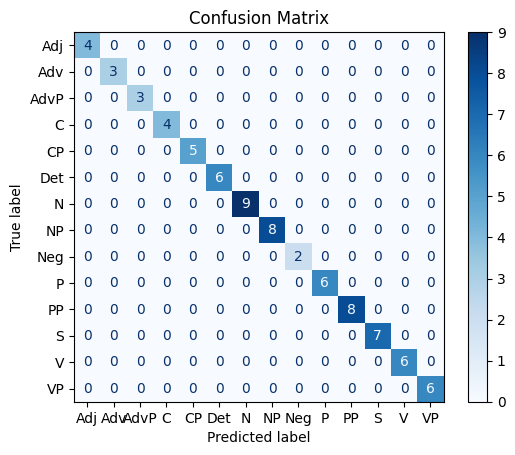

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from nltk import Tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to extract spans from a tree
def tree_to_spans(tree):
    spans = set()

    def traverse(node, start):
        if isinstance(node, Tree):
            label = node.label()
            end = start + len(node.leaves())
            spans.add((label, start, end))
            pos = start
            for child in node:
                traverse(child, pos)
                if isinstance(child, Tree):
                    pos += len(child.leaves())
        return spans

    return traverse(tree, 0)

# Function to evaluate precision, recall, F1, and accuracy
def calculate_metrics(gold_spans, generated_spans):
    correct_spans = gold_spans.intersection(generated_spans)

    # Metrics calculations
    precision = len(correct_spans) / len(generated_spans) if generated_spans else 0
    recall = len(correct_spans) / len(gold_spans) if gold_spans else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = len(correct_spans) / len(gold_spans.union(generated_spans)) if (gold_spans.union(generated_spans)) else 0

    return precision, recall, f1, accuracy

# Function to compute confusion matrix
def compute_confusion_matrix(gold_spans, generated_spans):
    # Create a label mapping
    labels = sorted(set(span[0] for span in gold_spans.union(generated_spans)))
    y_true = []
    y_pred = []

    for span in gold_spans:
        y_true.append(span[0])  # True labels from gold spans
        y_pred.append(span[0] if span in generated_spans else 'O')  # Predicted labels, 'O' if not in generated spans

    for span in generated_spans:
        if span not in gold_spans:
            y_true.append('O')  # If span is not in gold spans, it's an incorrect prediction
            y_pred.append(span[0])  # Use the generated span's label

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    return cm, labels

# Function to compare two files and calculate metrics
def compare_files(golden_file, standard_file):
    with open(golden_file, 'r') as gf, open(standard_file, 'r') as sf:
        gold_lines = gf.readlines()
        generated_lines = sf.readlines()

    # Ensure both files have the same number of lines
    assert len(gold_lines) == len(generated_lines), "Files must have the same number of lines."

    # Initialize span containers
    total_gold_spans = set()
    total_generated_spans = set()

    # Process each line pair
    for gold_line, generated_line in zip(gold_lines, generated_lines):
        gold_line = gold_line.strip()
        generated_line = generated_line.strip()

        try:
            # Convert lines to trees and extract spans
            gold_tree = Tree.fromstring(gold_line)
            generated_tree = Tree.fromstring(generated_line)

            total_gold_spans.update(tree_to_spans(gold_tree))
            total_generated_spans.update(tree_to_spans(generated_tree))

        except Exception as e:
            print(f"[ERROR] Unable to process lines:\n- Gold: {gold_line}\n- Generated: {generated_line}\n  Reason: {e}")

    # Calculate overall metrics
    precision, recall, f1, accuracy = calculate_metrics(total_gold_spans, total_generated_spans)

    # Display results
    print("\n--- Overall Evaluation Metrics ---")
    print(f"Precision: {precision:.2f}")
    print(f"Accuracy:  {accuracy:.2f}")
    print(f"Recall:    {recall:.2f}")
    print(f"F1 Score:  {f1:.2f}")
    print("----------------------------------")

    # Compute and display confusion matrix
    cm, labels = compute_confusion_matrix(total_gold_spans, total_generated_spans)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues')
    disp.ax_.set_title("Confusion Matrix")
    plt.show()  # This will now work correctly

# Input files
golden_file = "golden.txt"     # Expert annotations
standard_file = "standard.txt" # Machine-generated parses

# Run the comparison
compare_files(golden_file, standard_file)


This Python code is designed to evaluate the performance of a machine learning model by comparing its output to expert annotations using metrics such as precision, recall, F1 score, accuracy, and a confusion matrix. The code leverages several libraries, including `numpy`, `matplotlib.pyplot`, `nltk`, and `sklearn`, which facilitate numerical operations, plotting, natural language processing, and machine learning metrics, respectively.

### Function Overview

1. **tree_to_spans(tree)**: This function takes a syntactic parse tree as input and extracts spans—defined by their labels and start-end positions—from the tree. It employs a recursive `traverse` helper function that navigates through the tree nodes. For each subtree, it records the label and the positions of the leaves (tokens) it encompasses, resulting in a set of spans that represent the tree's structure.

2. **calculate_metrics(gold_spans, generated_spans)**: This function calculates key performance metrics based on the extracted spans. It identifies the correct spans by finding the intersection of the gold standard (expert annotations) and the generated spans from the model. The precision is computed as the ratio of true positives to the total predicted positives, recall is the ratio of true positives to the total actual positives, and the F1 score is the harmonic mean of precision and recall. Accuracy is defined as the ratio of correctly predicted spans to the total number of unique spans from both gold and generated data.

3. **compute_confusion_matrix(gold_spans, generated_spans)**: This function generates a confusion matrix to visualize the model's performance across different labels. It prepares true and predicted labels by iterating through the gold spans and appending corresponding labels to the lists. If a predicted span does not match any gold span, it is recorded as a false prediction. The confusion matrix itself is computed using `confusion_matrix` from `sklearn.metrics`, which summarizes how many predictions were correctly or incorrectly made across the various labels.

4. **compare_files(golden_file, standard_file)**: The main function that orchestrates the evaluation process. It opens two files: one containing expert annotations (gold standard) and the other with the model's output (standard). It reads the lines from both files, ensuring they match in number. For each line, it constructs trees and extracts their spans, accumulating these spans in sets for overall evaluation. After processing all lines, it calculates overall metrics and prints them. Finally, it computes the confusion matrix and uses `ConfusionMatrixDisplay` to plot it, providing a visual representation of the model's performance.

### Execution Flow

The script begins by defining the necessary functions. It specifies the input files: `golden.txt` for the expert annotations and `standard.txt` for the machine-generated parses. When `compare_files` is executed, it reads and processes the lines from both files, checking for errors during parsing. If successful, it accumulates the spans, calculates the metrics, and displays the results. The confusion matrix is then plotted, allowing for a visual interpretation of the model's classification performance across the different spans. 

### Visualization and Reporting

The output includes overall evaluation metrics like precision, accuracy, recall, and F1 score, which provide a quantitative assessment of the model's effectiveness. The confusion matrix visualizes how many instances were classified correctly versus incorrectly, helping to identify any biases or weaknesses in the model's predictions. The combination of these metrics and visualizations offers a comprehensive view of the model's performance in comparison to a trusted standard.